- title: Introduction to computer algebra in Python with sympy
- date: 2021-09-17

Computer algebra involves using computers to manipulate mathematical symbols. This is different from numerical computation, which involves using computers to handle mathematical expressions numerically. I will introduce `sympy`, a Python library for working with mathematical symbols and discuss examples from linear algebra, calculus and some physics applications.

# Limits of numerical precision

## Introduction


First, we need to import a library for symbolic computation. We'll be using
`sympy` for this purpose. We'll also import `numpy` for a few comparisons.

I recommend avoiding `from sympy import *` (even though this is used in the
[`sympy` tutorial](http://docs.sympy.org/latest/tutorial/)), since we will
want to use some functions, like `sqrt`, from both a symbolic and a numeric
library.

In [1]:
import numpy as np
import sympy as sy

Sometimes we have an exact expression that is corrupted by
the numerical imprecision of a library like `numpy`. For example,
consider $\sqrt{3}$. `numpy` gives us a floating point approximation that doesn't
have all the properties we might like:

In [2]:
np.sqrt(3)

1.7320508075688772

In [3]:
np.sqrt(3)**2 - 3

-4.440892098500626e-16

`sympy` gives us an object that has the properties we want:

In [4]:
sy.sqrt(3)

sqrt(3)

In [5]:
sy.sqrt(3)**2 - 3

0

`sympy` is also capable of displaying expressions in a more human-friendly
format.

In [6]:
sy.init_printing()

In [7]:
sy.sqrt(3)

The real power of `sympy` is the ability to manipulate variables. Some computer algebra systems (CAS) allow the user to immediately input expressions with variables. An example is [maxima](https://maxima.sourceforge.io)

Since `sympy` is used within a full Python programming environment, we need to do a little setup first and define some *Python* variables to function as our symbolic variables.

In [8]:
x, y, z = sy.symbols('x y z')
x, y, z

In [9]:
x + y

## Expressions

We can make all kinds of expressions in `sympy` using both arithmetic operators from Python
(to which `sympy` gives special meaning) and functions that `sympy` provides for us:

In [10]:
x * y + z **2

Just like with `sqrt`, `sympy` can hold exact values of `sin`, whereas `numpy` gives a floating-point
approximation:

In [11]:
sy.sin(x)**2 + sy.cos(x)**2

In [12]:
s2c2 = sy.sin(x)**2 + sy.cos(x)**2

s2c2

### Simplification

A lot of times we want to manipulate an expression without changing what it represents. `sympy`
has a variety of functions for doing this. `simplify` is the most generic:

In [13]:
sy.simplify(sy.sin(x)**2 + sy.cos(x)**2)

In [14]:
sy.simplify(s2c2)

In [15]:
type(s2c2)

sympy.core.add.Add

In [16]:
type(x)

sympy.core.symbol.Symbol

Sometimes `sympy` doesn't automatically know what we mean by "simple", so there are functions to
put expressions in particular forms. For instance, we might want to expand $(x+y)(x-y)$ to
$x^2-y^2$:

In [17]:
expr = (x + y) * (x - y)
expr

In [18]:
sy.simplify(expr)

In [19]:
sy.expand(expr)

We might also want to go the other way:

In [20]:
sy.factor(x**2 - y**2)

See more examples in the tutorial section
[Simplification](http://docs.sympy.org/latest/tutorial/simplification.html).

### Example: checking a phase

Sometimes we want to verify properties of our expressions, e.g. show that the
magnitude of a complex phase is 1. Let's set up some real variables $a$ and $b$
for the real and imaginary parts of a complex number $c=a+ib$:

In [21]:
a, b = sy.symbols('a b', real=True)
a, b

`sympy` knows that $a$ and $b$ are real, so they remain unchanged when we take their complex conjugates:

In [22]:
a.conjugate()

In [23]:
x.conjugate()

Let's express the phase of $a+bi$ using `sympy`:

In [24]:
c = a + b * sy.I
c

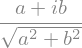

In [25]:
phase = sy.simplify(c / sy.sqrt(c * c.conjugate()))
phase

A complex phase $\omega$ has the property that $\omega\omega^*=1$. Let's see if
our expression satisfies that property:

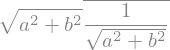

In [26]:
phase_mag = sy.simplify(phase * phase.conjugate())
phase_mag

`sympy` isn't realizing that $a^2+b^2$ is positive, and that therefore the conjugation doesn't do
anything. We can take `sympy` by the hand and manually point this out, first defining a
pair of expressions we know are equivalent:

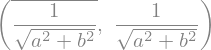

In [27]:
subpair = ((1 / sy.sqrt(a**2 + b**2)).conjugate(),
           1 / sy.sqrt(a**2 + b**2))
subpair

Then we can use `subs` to perform a substitution within our expression:

In [28]:
phase_mag.subs([subpair])

Sometimes you can force `sympy` to make simplifications that may note be justified
in general. For instance, you might think $x^zy^z$ should be the same as $(xy)^z$. It
is when $x,y,z$ are real, but `sympy` doesn't currently know they're real:

In [29]:
sy.powsimp((x*y)**z - x**z * y**z, force=True)

We can tell `sympy` to make simplifications that aren't justified in general by
supplying `force=True` to the `powsimp` function:

### Displaying expressions nicely

Sometimes we want to display our expressions with a little more context that `sympy` spits out.
We can use the rich HTML rendering system of jupyter notebooks together with the `latex`
export functionality provided by `sympy` to make our notebooks legible.

In [30]:
from IPython.display import HTML 

`latex` converts a `sympy` expression to LaTeX code:

In [31]:
sy.latex(phase)

'\\frac{a + i b}{\\sqrt{a^{2} + b^{2}}}'

If we want it rendered prettily, we need to wrap it in some math environment and explicitly use the
`HTML` function to format it for our notebook:

In [32]:
HTML('$' + sy.latex(c) + '$')

This is a little more verbose, but it allows us greater flexibilitym for instance adding
context to printing out the value of $c$:

In [33]:
HTML('$c=' + sy.latex(c) + '$')

We can even use advanced environments like align, but it will be helpful
to use raw string literals so we don't have to worry about all the `\`s:

In [34]:
HTML(r'\begin{align}|c|&=' + sy.latex(sy.sqrt(c * c.conjugate())) + 
     r'\\ \mathrm{sgn}(c)&=' + sy.latex(phase) + r'\end{align}')

You can also use this LaTeX in your paper. If you want to save the result of a calculation for
future manipulation, however, it's best not to use LaTeX (since it can be ambiguous). `sympy`'s
`srepr` function is better suited for this.

In [35]:
saved_phase = sy.srepr(phase)
saved_phase

"Mul(Add(Symbol('a', real=True), Mul(I, Symbol('b', real=True))), Pow(Add(Pow(Symbol('a', real=True), Integer(2)), Pow(Symbol('b', real=True), Integer(2))), Rational(-1, 2)))"

In [36]:
type(saved_phase)

str

You can use `sympify` (not to be confused with `simplify`!) to convert an `srepr` string back to an expression:

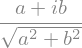

In [37]:
loaded_phase = sy.sympify(saved_phase)
loaded_phase

If you loaded an expression that has symbols you haven't defined yet,
you can get the new symbols from the expression in a
[set](https://docs.python.org/3/tutorial/datastructures.html#sets):

In [38]:
loaded_phase.free_symbols

Sympy interprets `srepr` are expressions trees. [https://docs.sympy.org/latest/tutorial/manipulation.html] 

This helps with working with these expressions.

In [39]:
sy.srepr(loaded_phase)

"Mul(Add(Symbol('a', real=True), Mul(I, Symbol('b', real=True))), Pow(Add(Pow(Symbol('a', real=True), Integer(2)), Pow(Symbol('b', real=True), Integer(2))), Rational(-1, 2)))"

## Numerical evaluation

`sympy` can be used for numerical evaluation using `.evalf`.

In [40]:
sympy_sqrt3 = sy.sqrt(3)

In [41]:
(sympy_sqrt3**2 - 3).evalf()